In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

class BoundedConfidenceGrid:
    def __init__(self, size=10, epsilon=0.2, mu=0.5):
        """
        Initialize the bounded confidence model on a square grid.
        
        Args:
            size (int): Size of the square grid (size x size)
            epsilon (float): Confidence bound (threshold for opinion difference)
            mu (float): Convergence parameter (weight of opinion adoption)
        """
        self.size = size
        self.epsilon = epsilon
        self.mu = mu
        
        # Create grid graph
        self.graph = ig.Graph.Lattice([size, size], nei=1, directed=False)
        
        # Initialize random opinions between 0 and 1
        self.opinions = np.random.random(size * size)
        
    def update_step(self):
        """Perform one update step of the model."""
        # Random order of node updates
        nodes = np.random.permutation(self.graph.vcount())
        
        for node in nodes:
            # Get neighbors
            neighbors = self.graph.neighbors(node)
            
            # Current opinion
            opinion = self.opinions[node]
            
            # Filter neighbors within confidence bound
            valid_neighbors = [
                n for n in neighbors 
                if abs(self.opinions[n] - opinion) < self.epsilon
            ]
            
            if valid_neighbors:
                # Update opinion based on mean of compatible neighbors
                neighbor_opinions = [self.opinions[n] for n in valid_neighbors]
                mean_opinion = np.mean(neighbor_opinions)
                self.opinions[node] = opinion + self.mu * (mean_opinion - opinion)
    
    def run_simulation(self, steps):
        """
        Run the simulation for a specified number of steps.
        
        Args:
            steps (int): Number of simulation steps
            
        Returns:
            list: History of opinion distributions
        """
        history = [self.opinions.copy()]
        
        for _ in range(steps):
            self.update_step()
            history.append(self.opinions.copy())
            
        return history
    
    def plot_current_state(self):
        """Plot the current state of opinions on the grid."""
        plt.figure(figsize=(8, 8))
        opinions_grid = self.opinions.reshape((self.size, self.size))
        plt.imshow(opinions_grid, cmap='viridis', interpolation='nearest')
        plt.colorbar(label='Opinion Value')
        plt.title('Opinion Distribution on Grid')
        plt.show()

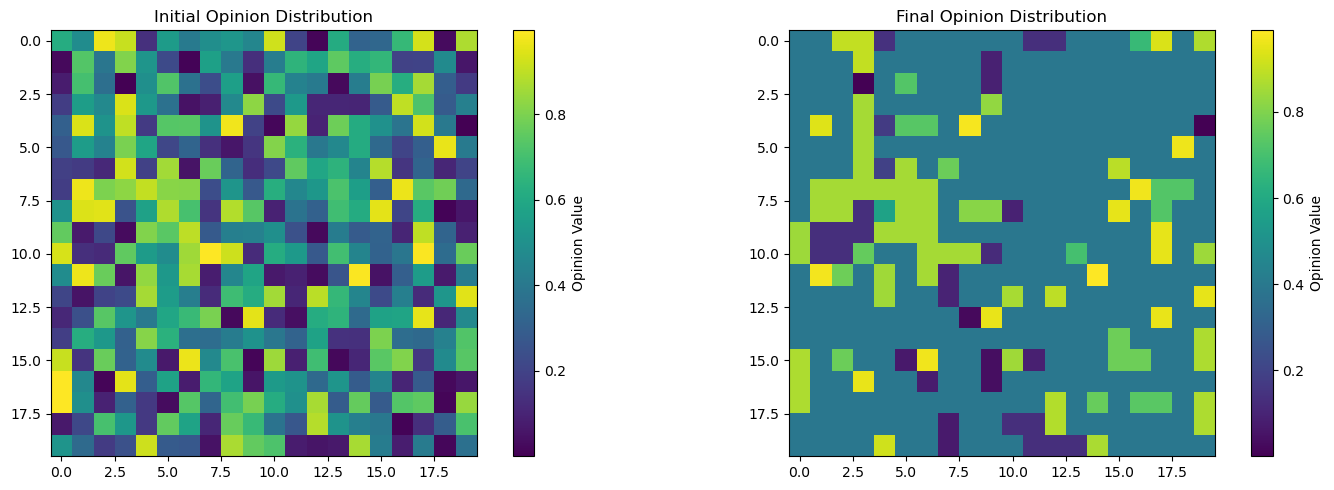

In [5]:
model = BoundedConfidenceGrid(size=20, epsilon=0.2, mu=0.3)

# Run simulation
history = model.run_simulation(steps=10000)

# Plot initial and final states
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.imshow(history[0].reshape((model.size, model.size)), 
            cmap='viridis', interpolation='nearest')
plt.colorbar(label='Opinion Value')
plt.title('Initial Opinion Distribution')

plt.subplot(122)
plt.imshow(history[-1].reshape((model.size, model.size)), 
            cmap='viridis', interpolation='nearest')
plt.colorbar(label='Opinion Value')
plt.title('Final Opinion Distribution')

plt.tight_layout()
plt.show()

In [22]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

class BoundedConfidenceGrid:
    def __init__(self, size=10, epsilon=0.2, mu=0.5, initial_opinions=None):
        self.size = size
        self.epsilon = epsilon
        self.mu = mu
        
        self.graph = ig.Graph.Lattice([size, size], nei=1, directed=False)
        self.layout = self.graph.layout_grid()
        
        if initial_opinions is not None:
            self.opinions = initial_opinions.copy()
        else:
            self.opinions = np.random.random(size * size)
        
    def get_opinions(self):
        return self.opinions.copy()
        
    def set_opinions(self, opinions):
        self.opinions = opinions.copy()
        
    def update_step(self):
        nodes = np.random.permutation(self.graph.vcount())
        for node in nodes:
            neighbors = self.graph.neighbors(node)
            opinion = self.opinions[node]
            valid_neighbors = [n for n in neighbors if abs(self.opinions[n] - opinion) < self.epsilon]
            if valid_neighbors:
                neighbor_opinions = [self.opinions[n] for n in valid_neighbors]
                mean_opinion = np.mean(neighbor_opinions)
                self.opinions[node] = opinion + self.mu * (mean_opinion - opinion)
    
    def run_simulation(self, steps):
        history = [self.opinions.copy()]
        for _ in range(steps):
            self.update_step()
            history.append(self.opinions.copy())
        return history
    
    def plot_current_state(self, title="Opinion Distribution", node_size=100, alpha=0.7, edge_alpha=0.3):
        fig, ax = plt.subplots(figsize=(10, 10))
        
        xs = [coord[0] for coord in self.layout]
        ys = [coord[1] for coord in self.layout]
        
        # Plot edges first
        for edge in self.graph.es:
            v1, v2 = edge.tuple
            ax.plot([self.layout[v1][0], self.layout[v2][0]], 
                   [self.layout[v1][1], self.layout[v2][1]], 
                   'gray', linewidth=0.5, alpha=edge_alpha)
        
        # Plot nodes on top
        sc = ax.scatter(xs, ys, c=self.opinions, cmap='coolwarm', s=node_size, alpha=alpha)
        plt.colorbar(sc)
        
        ax.set_title(title)
        ax.axis('off')
        plt.show()

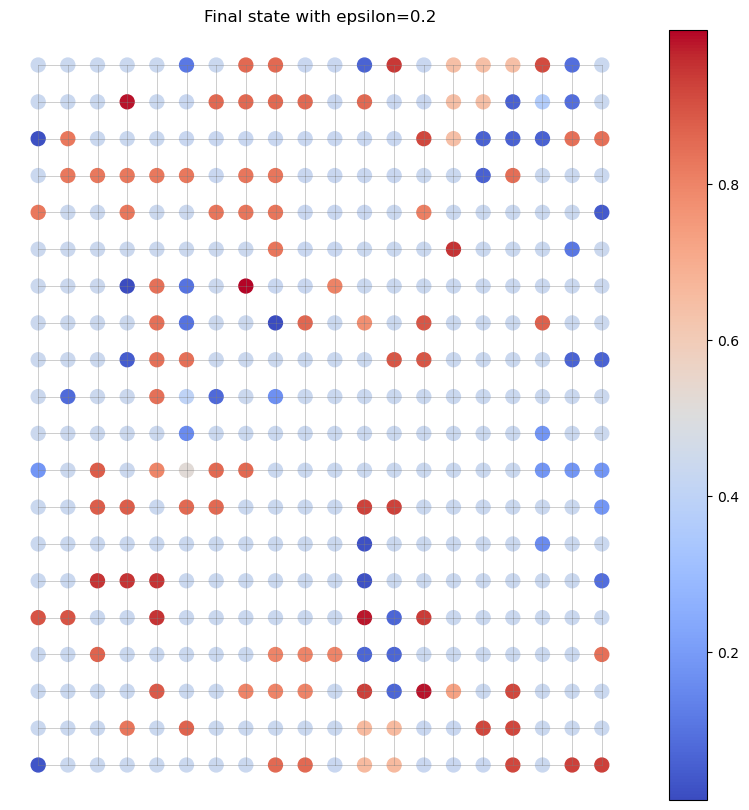

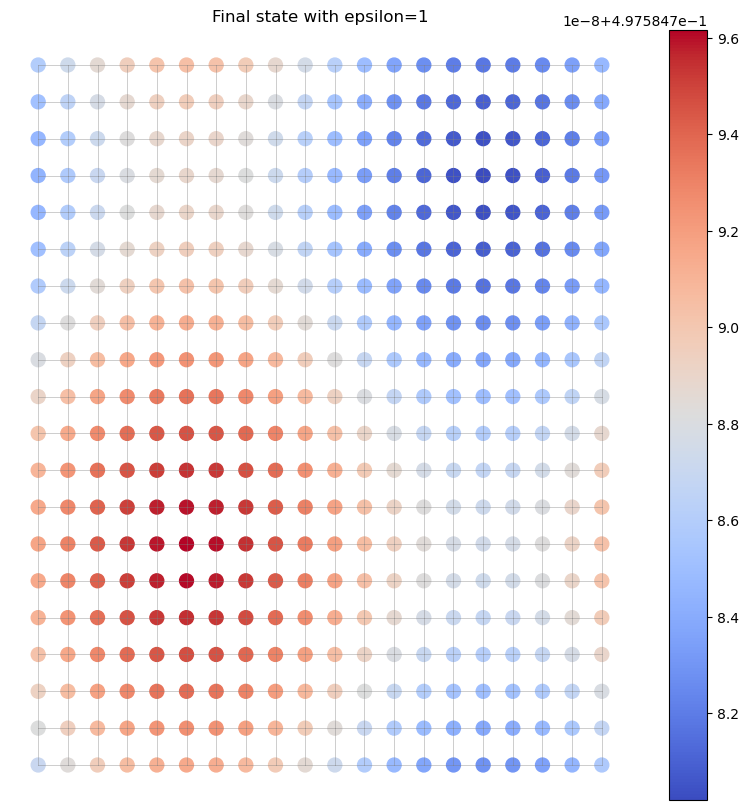

In [24]:
# Generate initial configuration
initial_model = BoundedConfidenceGrid(size=20)
initial_opinions = initial_model.get_opinions()

# Compare different epsilon values
epsilons = [0.2, 1]
steps = 1000

for eps in epsilons:
    model = BoundedConfidenceGrid(size=20, epsilon=eps, initial_opinions=initial_opinions)
    model.run_simulation(steps)
    model.plot_current_state(f"Final state with epsilon={eps}", alpha=1)